# STEEPEST DESCENT (CAUCHY) METHOD

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from autograd import grad

def steepest_descent(f, x0, alpha=0.01, tol=0.01, max_iter=1000):
    grad_f = grad(f)  # Automatically compute the gradient of f using autograd
    x = x0.astype(float)  # Convert x0 to float type
    x_history = [x]
    i = 1
    while True:
        grad_val = grad_f(x)
        if np.linalg.norm(grad_val) < tol:
            print("Search direction has approximately converged to zero. Stopping optimization.")
            break
        search_direction = -grad_val
        def f_alpha(alpha): 
            return f(x + alpha * search_direction)
        alpha_opt = minimize_scalar(f_alpha).x
        x_new = x + alpha_opt * search_direction
        print("Iteration:", i)
        print("Search Direction:", search_direction)
        print("Optimal Length:", alpha_opt)
        print("New x value:", x_new)
        print("----------")
        x = x_new
        x_history.append(x)
        i += 1
        if np.linalg.norm(search_direction) < tol:
            print("Search direction has approximately converged to zero. Stopping optimization.")
            break
        if i > max_iter:
            print("Maximum number of iterations reached. Stopping optimization.")
            break
    return x, f(x), x_history

### Minimize f (x1 , x2 ) = x1 − x2 + 2x1 + 2x1 x2 + x2 starting from the point X1 = (0,0)

Iteration: 1
Search Direction: [-1.  1.]
Optimal Length: 1.0
New x value: [-1.  1.]
----------
Iteration: 2
Search Direction: [1. 1.]
Optimal Length: 0.20000000296999998
New x value: [-0.8  1.2]
----------
Iteration: 3
Search Direction: [-0.20000002  0.19999999]
Optimal Length: 0.999999866310005
New x value: [-0.99999999  1.39999996]
----------
Iteration: 4
Search Direction: [0.20000002 0.20000005]
Optimal Length: 0.20000000772519894
New x value: [-0.95999998  1.43999998]
----------
Iteration: 5
Search Direction: [-0.04000002  0.04000001]
Optimal Length: 0.9999997326200122
New x value: [-0.99999999  1.47999998]
----------
Iteration: 6
Search Direction: [0.04000002 0.04000003]
Optimal Length: 0.2000001216264139
New x value: [-0.99199999  1.48799999]
----------
Iteration: 7
Search Direction: [-0.00800004  0.00799999]
Optimal Length: 0.9999949525598912
New x value: [-0.99999998  1.49599994]
----------
Iteration: 8
Search Direction: [0.00800005 0.00800008]
Optimal Length: 0.200000182627553

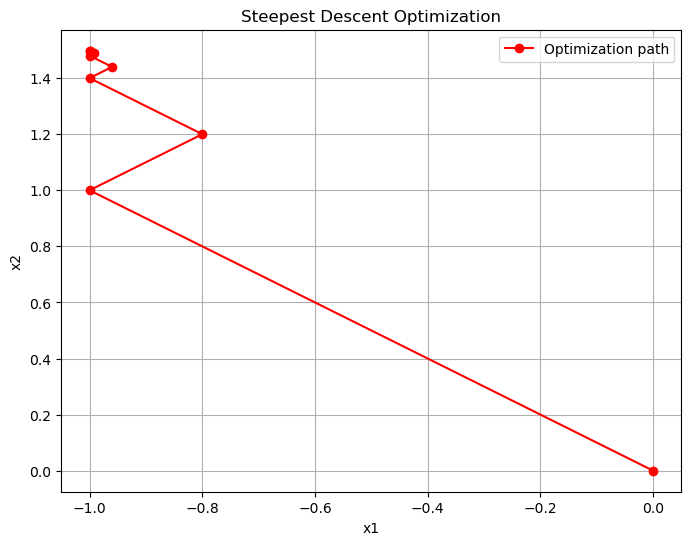

Optimal solution: [-0.99839997  1.49759996]
Optimal value: -1.2499967998884136


In [22]:
# Define the function to be minimized
def f(x):
    return x[0] - x[1] + 2*x[0]**2 + 2*x[0]*x[1] + x[1]**2

# Initial guess
x0 = np.array([0,0])

# Perform steepest descent optimization
x_opt, f_opt, x_history = steepest_descent(f, x0)

# Plot the optimization path
x_history = np.array(x_history)
plt.figure(figsize=(8, 6))
plt.plot(x_history[:, 0], x_history[:, 1], marker='o', color='r', label='Optimization path')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Steepest Descent Optimization')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal solution:", x_opt)
print("Optimal value:", f_opt)

### Minimize f = 2x12 + x22 by using the steepest descent method with the starting point (1, 2) - BOOK BACK EXAMPLE(6.43)

Iteration: 1
Search Direction: [-4. -4.]
Optimal Length: 0.33333333333333337
New x value: [-0.33333333  0.66666667]
----------
Iteration: 2
Search Direction: [ 1.33333333 -1.33333333]
Optimal Length: 0.3333333333333333
New x value: [0.11111111 0.22222222]
----------
Iteration: 3
Search Direction: [-0.44444444 -0.44444444]
Optimal Length: 0.33333333333333337
New x value: [-0.03703704  0.07407407]
----------
Iteration: 4
Search Direction: [ 0.14814815 -0.14814815]
Optimal Length: 0.3333333333333331
New x value: [0.01234568 0.02469136]
----------
Iteration: 5
Search Direction: [-0.04938272 -0.04938272]
Optimal Length: 0.3333333333333337
New x value: [-0.00411523  0.00823045]
----------
Iteration: 6
Search Direction: [ 0.01646091 -0.01646091]
Optimal Length: 0.333333333333333
New x value: [0.00137174 0.00274348]
----------
Search direction has approximately converged to zero. Stopping optimization.


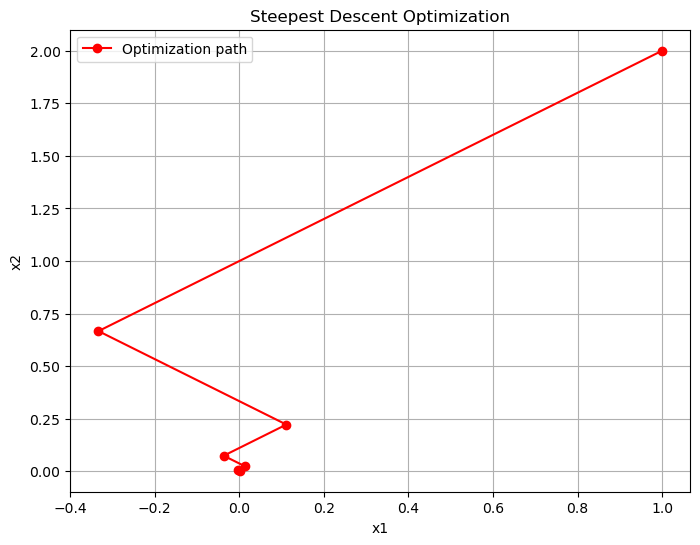

Optimal solution: [0.00137174 0.00274348]
Optimal value: 1.1290058538953526e-05


In [25]:
# Define the function to be minimized
# def f(x):return 6*x[0]**2 + 2*x[1]**2 -6*x[0]*x[1] - x[0] - 2*x[1]
def f(x):
    return 2*x[0]**2 + x[1]**2

# Initial guess
x0 = np.array([1,2])

# Perform steepest descent optimization
x_opt, f_opt, x_history = steepest_descent(f, x0)

# Plot the optimization path
x_history = np.array(x_history)
plt.figure(figsize=(8, 6))
plt.plot(x_history[:, 0], x_history[:, 1], marker='o', color='r', label='Optimization path')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Steepest Descent Optimization')
plt.legend()
plt.grid(True)
plt.show()

print("Optimal solution:", x_opt)
print("Optimal value:", f_opt)